In [2]:
import rtree
import pathlib
import fiona
from toolz import take
from shapely import geometry

In [3]:
resources = pathlib.Path('resources')
with fiona.open(resources / 'watercourse.geojson') as src:
    meta = src.meta
    features = [{
            'properties': s['properties'], 
            'type': s['type'],
            'geometry': geometry.asShape(s['geometry'])
        } for s in src
    ]

In [4]:
feature = features[0]

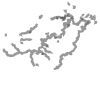

In [6]:
feature['geometry']

In [82]:
# Create rtree
geometry = feature['geometry']
leaves = ((idx, g.bounds, (feature.start, feature.end)))

In [83]:
len(geometry)

34

In [80]:
for feature in features:
    

[{'properties': OrderedDict([('OBJECTID_2', 1),
               ('Parcel_type', 'W'),
               ('SHAPE_Length', 589366.984392741),
               ('SHAPE_Area', 9739564.714262636)]),
  'type': 'Feature',
  'geometry': <shapely.geometry.multipolygon.MultiPolygonAdapter at 0x124dfeda0>}]

In [74]:
with open(resources / 'watercourse.geojson') as src:
    print(list(take(1, src)))

['{"type":"FeatureCollection","features":[{"type":"Feature","properties":{"OBJECTID_2":1,"Parcel_type":"W","SHAPE_Length":589366.984392741,"SHAPE_Area":9739564.714262636},"geometry":{"type":"MultiPolygon","coordinates":[[[[152.89684152996838,-27.799643283443018],[152.89692774099314,-27.799655983654304],[152.89690312866404,-27.799567874438225],[152.89682990272777,-27.799457615932706],[152.896736167185,-27.7992581678972],[152.89666687877988,-27.799056390916853],[152.89665950783794,-27.798884355457034],[152.8966160617217,-27.798707780127867],[152.89654953448058,-27.79841881702994],[152.89639500041304,-27.798336116268153],[152.89619125068583,-27.798335873048355],[152.89607249573885,-27.798393096994708],[152.89589447258848,-27.79845244190032],[152.895739820757,-27.7984063849625],[152.89576065226228,-27.79833076513157],[152.89582010738764,-27.798220786670157],[152.89582025723016,-27.798152010366344],[152.89574044131396,-27.798106099211875],[152.89553393951311,-27.798183745387142],[152.895371

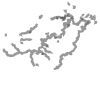

In [71]:
features[0]

In [ ]:
for feature in features:
    if feature.geom_type.startswith('Multi'):
        leaves = enumerate(f.bounds for f in feature)

In [67]:
if feature.geom_type.startswith('Multi'):
    features = list(f.bounds for f in feature)

In [53]:
%pylab

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


/Users/jess/.local/conda/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['shape']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


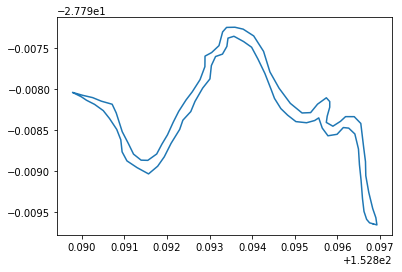

In [28]:
plot(*shape.boundary.xy)